<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/AI_W6_11_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


191.6111111111115


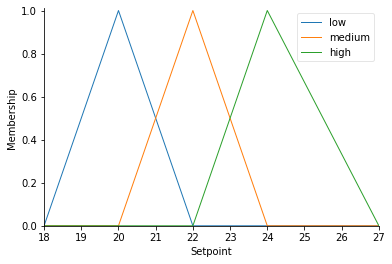

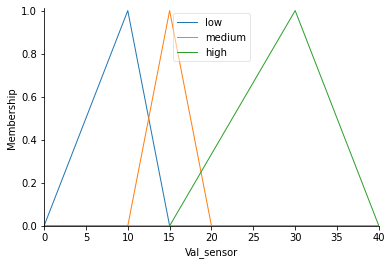

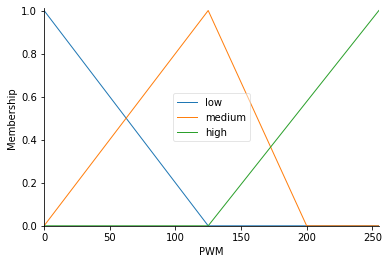

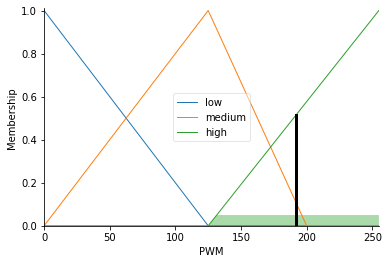

In [ ]:
#Dieu khien dong co
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18,28,1),'Setpoint')
Val_sensor = ctrl.Antecedent(np.arange(0,41,1),'Val_sensor')

PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')

Setpoint['low'] = fuzz.trimf(Setpoint.universe,[18,20,22])
Setpoint['medium'] = fuzz.trimf(Setpoint.universe,[20,22,24])
Setpoint['high'] = fuzz.trimf(Setpoint.universe,[22,24,27])

Val_sensor['low'] = fuzz.trimf(Val_sensor.universe,[0,10,15])
Val_sensor['medium'] = fuzz.trimf(Val_sensor.universe,[10,15,20])
Val_sensor['high'] = fuzz.trimf(Val_sensor.universe,[15,30,40])

PWM['low'] = fuzz.trimf(PWM.universe,[0,0,125])
PWM['medium'] = fuzz.trimf(PWM.universe,[0,125,200])
PWM['high'] = fuzz.trimf(PWM.universe,[125,255,255])

rule1 = ctrl.Rule(Setpoint['low']&Val_sensor['low'],PWM['low'])
rule2 = ctrl.Rule(Setpoint['low']&Val_sensor['medium'],PWM['low'])
rule3 = ctrl.Rule(Setpoint['low']&Val_sensor['high'],PWM['medium'])

rule4 = ctrl.Rule(Setpoint['medium']&Val_sensor['low'],PWM['medium'])
rule5 = ctrl.Rule(Setpoint['medium']&Val_sensor['medium'],PWM['medium'])
rule6 = ctrl.Rule(Setpoint['medium']&Val_sensor['high'],PWM['high'])

rule7 = ctrl.Rule(Setpoint['high']&Val_sensor['low'],PWM['medium'])
rule8 = ctrl.Rule(Setpoint['high']&Val_sensor['medium'],PWM['high'])
rule9 = ctrl.Rule(Setpoint['high']&Val_sensor['high'],PWM['high'])

Setpoint.view()
Val_sensor.view()
PWM.view()

PWM_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,
                              rule4,rule5,rule6,
                              rule7,rule8,rule9])
PWMing = ctrl.ControlSystemSimulation(PWM_ctrl)

PWMing.input['Setpoint']=26.5
PWMing.input['Val_sensor']=39.5
PWMing.compute()
print(PWMing.output['PWM'])
PWM.view(sim=PWMing)

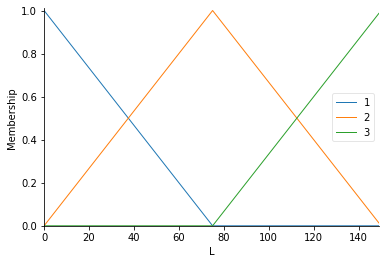

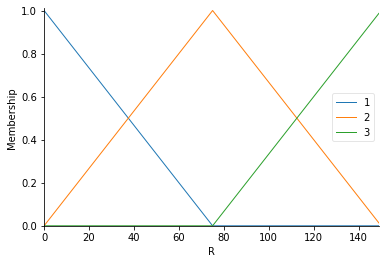

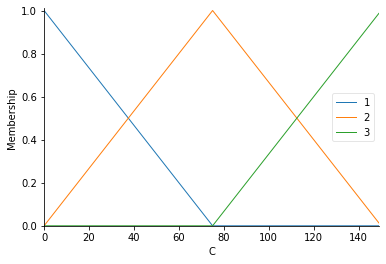

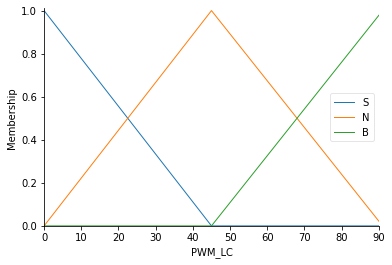

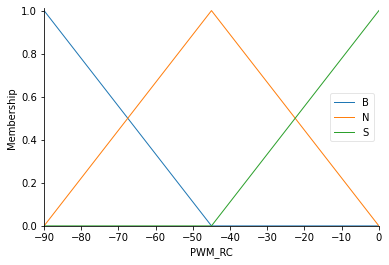

In [52]:
from networkx.generators.small import LCF_graph
#Dieu khien ModuleRobot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L = ctrl.Antecedent(np.arange(0,150,1),'L')
C = ctrl.Antecedent(np.arange(0,150,1),'C')
R = ctrl.Antecedent(np.arange(0,150,1),'R')

PWM_L = ctrl.Consequent(np.arange(0,91,1),'PWM_L')
PWM_R = ctrl.Consequent(np.arange(-91,1,1),'PWM_R')
PWM_LC = ctrl.Consequent(np.arange(0,91,1),'PWM_LC')
PWM_RC = ctrl.Consequent(np.arange(-90,1,1),'PWM_RC')


L['N'] = fuzz.trimf(L.universe,[0,0,75])
L['M'] = fuzz.trimf(L.universe,[0,75,150])
L['F'] = fuzz.trimf(L.universe,[75,150,150])

C['N'] = fuzz.trimf(C.universe,[0,0,75])
C['M'] = fuzz.trimf(C.universe,[0,75,150])
C['F'] = fuzz.trimf(C.universe,[75,150,150])

R['N'] = fuzz.trimf(C.universe,[0,0,75])
R['M'] = fuzz.trimf(C.universe,[0,75,150])
R['F'] = fuzz.trimf(C.universe,[75,150,150])

PWM_RC['B'] = fuzz.trimf(PWM_RC.universe,[-90,-90,-45])
PWM_RC['N'] = fuzz.trimf(PWM_RC.universe,[-90,-45,0])
PWM_RC['S'] = fuzz.trimf(PWM_RC.universe,[-45,0,0])

PWM_LC['S'] = fuzz.trimf(PWM_LC.universe,[0,0,45])
PWM_LC['N'] = fuzz.trimf(PWM_LC.universe,[0,45,91])
PWM_LC['B'] = fuzz.trimf(PWM_LC.universe,[45,91,91])

L.view();R.view();C.view()
PWM_LC.view();PWM_RC.view()

rule1 = ctrl.Rule(L['N']&C['N'],PWM_LC['S'])
rule2 = ctrl.Rule(L['N']&C['M'],PWM_LC['N'])
rule3 = ctrl.Rule(L['N']&C['F'],PWM_LC['B'])
rule4 = ctrl.Rule(L['M']&C['N'],PWM_LC['S'])
rule5 = ctrl.Rule(L['M']&C['M'],PWM_LC['N'])
rule6 = ctrl.Rule(L['M']&C['F'],PWM_LC['N'])
rule7 = ctrl.Rule(L['F']&C['N'],PWM_LC['S'])
rule8 = ctrl.Rule(L['F']&C['M'],PWM_LC['N'])

rule9 = ctrl.Rule(R['N']&C['N'],PWM_RC['S'])
rule10 = ctrl.Rule(R['N']&C['M'],PWM_RC['N'])
rule11 = ctrl.Rule(R['N']&C['F'],PWM_RC['B'])
rule12 = ctrl.Rule(R['M']&C['N'],PWM_RC['S'])
rule13 = ctrl.Rule(R['M']&C['M'],PWM_RC['N'])
rule14 = ctrl.Rule(R['M']&C['F'],PWM_RC['N'])
rule15 = ctrl.Rule(R['F']&C['N'],PWM_RC['S'])
rule16 = ctrl.Rule(R['F']&C['M'],PWM_RC['N'])












